<h3> Harris Corner detection </h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [36]:
# Flat chess

flatChess = cv.imread('DATA/flat_chessboard.png')
flatChess = cv.cvtColor(flatChess, cv.COLOR_BGR2RGB)
grayFlatChess = cv.cvtColor(flatChess, cv.COLOR_BGR2GRAY)

# Real chess

realChess = cv.imread('DATA/real_chessboard.jpg')
realChess = cv.cvtColor(realChess, cv.COLOR_BGR2RGB)
grayRealChess = cv.cvtColor(realChess, cv.COLOR_BGR2GRAY)

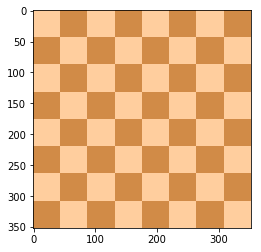

In [3]:
plt.imshow(flatChess)

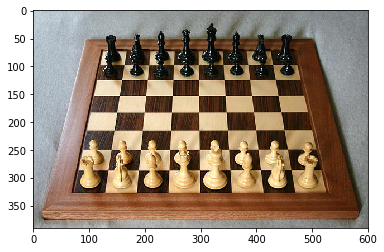

In [4]:
plt.imshow(realChess)

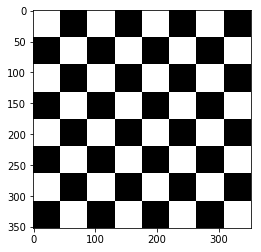

In [6]:
plt.imshow(grayFlatChess, cmap='gray')

In [9]:
grayFlatChess

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [8]:
# we require the values to be of floating type
grayFlatChess = np.float32(grayFlatChess)

In [11]:
# blockSize is the neighbourhood size
# ksize is aperture for sobel operator
# k is a constant in the Harris' formula with value either 0.04 or 0.06
dst = cv.cornerHarris(src = grayFlatChess, blockSize=2, ksize=3, k=0.04)

In [18]:
# for visualization purposes
dst = cv.dilate(dst, None)

In [19]:
flatChess[dst > 0.01*dst.max()] = [255,0,0]

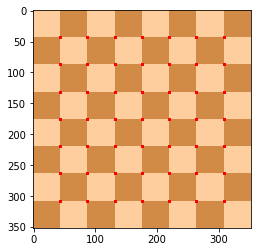

In [20]:
plt.imshow(flatChess)

In [39]:
grayRealChess = np.float32(grayRealChess)

dst = cv.cornerHarris(grayRealChess,4,3,0.06)
dst = cv.dilate(dst,None)
realChess[dst > 0.01*dst.max()] = [255,0,0]

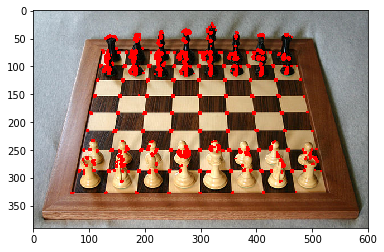

In [40]:
plt.imshow(realChess)

<h3> Shi-Tomasi corner detection </h3>
The response calculation changes from <br>
R = det(M) - k(trace(M))<sup>2</sup> <br>
------where M is structure tensor, <br>
------det(M) = &lambda;<sub>1</sub> . &lambda;<sub>2</sub>, <br>
------trace(M) = &lambda;<sub>1</sub> + &lambda;<sub>2</sub>, <br>
------k = |0.04,0.06| <br><br>
to <br><br>
R = min(&lambda;<sub>1</sub>, &lambda;<sub>1</sub>)
<br>
where &lambda;<sub>1</sub> , &lambda;<sub>2</sub> are eigen values of M 

In [41]:
# Load the images again

# Flat chess

flatChess = cv.imread('DATA/flat_chessboard.png')
flatChess = cv.cvtColor(flatChess, cv.COLOR_BGR2RGB)
grayFlatChess = cv.cvtColor(flatChess, cv.COLOR_BGR2GRAY)

# Real chess

realChess = cv.imread('DATA/real_chessboard.jpg')
realChess = cv.cvtColor(realChess, cv.COLOR_BGR2RGB)
grayRealChess = cv.cvtColor(realChess, cv.COLOR_BGR2GRAY)

In [51]:
# the third parameter is quality level which is multiplied with R
corners = cv.goodFeaturesToTrack(grayFlatChess, 48, 0.01, 10)

In [43]:
# doesnt return a grid like cornerharris does
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]],

       [[176., 264.]],

       [[132., 264.]],

       [[ 88., 264.]],

       [[ 44., 264.]],

       [[308., 220.]],

       [[264., 220.]],

       [[220., 220.]],

       [[176., 220.]],

       [[132., 220.]],

       [[ 88., 220.]],

       [[ 44., 220.]],

       [[308., 176.]],

       [[264., 176.]],

       [[220., 176.]],

       [[176., 176.]],

       [[132., 176.]],

       [[ 88., 176.]],

       [[ 44., 176.]],

       [[308., 132.]],

       [[264., 132.]],

       [[220., 132.]],

       [[176., 132.]],

       [[132., 132.]],

       [[ 88., 132.]],

       [[ 44., 132.]],

       [[308.,  88.]],

       [[264.,  88.]],

       [[220.,  88.]],

       [[176.,  88.]],

       [[132.,  88.]],

       [[ 88.,  88.]],

       [[ 44.,  

In [52]:
corners = np.int0(corners)

In [53]:
for i in corners:
    
    # returns the item as 1D array
    x,y = i.ravel()
    
    cv.circle(flatChess, (x,y), 5, (255,0,0), -1)

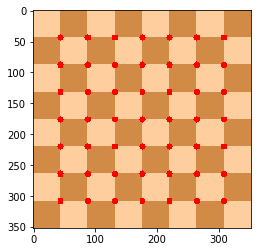

In [54]:
plt.imshow(flatChess)

In [64]:
corners = cv.goodFeaturesToTrack(grayRealChess, 80, 0.01, 10)
corners = np.int0(corners)

In [65]:
for i in corners:
    x,y = i.ravel()
    cv.circle(realChess, (x,y), 5, (255,0,0), -1)

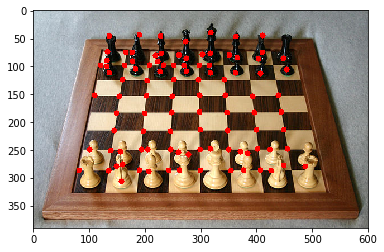

In [66]:
plt.imshow(realChess)